In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM
import matplotlib.pyplot as plt

# Read Data

In [ ]:
train_data = pd.read_csv('/content/train_data.txt', delimiter=',')
test_data = pd.read_csv('/content/test_data.txt', delimiter=',')

In [ ]:
train_data

,ID,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5817,5818,36,1,1,2,8,0,6,1,2,...,0,0,0,1,0,0,0,0,0,0
5818,5819,35,1,4,4,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
5819,5820,33,1,3,4,8,0,6,0,3,...,0,0,0,1,0,0,0,0,0,1
5820,5821,34,1,3,2,8,0,7,0,2,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data

,ID,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,1,33,1,4,2,8,0,6,0,3,...,0,0,0,0,1,0,0,0,0,0
1,2,6,1,3,2,2,0,5,0,4,...,2,0,0,0,1,0,0,0,0,0
2,3,39,1,3,3,9,1,4,2,3,...,1,0,0,0,1,0,0,0,0,0
3,4,9,1,2,3,3,2,3,2,4,...,0,0,0,0,1,0,0,0,0,0
4,5,31,1,2,4,7,0,2,0,7,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,33,1,2,4,8,0,7,2,0,...,0,0,0,0,1,0,0,0,0,0
3996,3997,24,1,2,3,5,1,5,1,3,...,1,0,0,0,1,0,0,0,0,0
3997,3998,36,1,2,3,8,1,5,1,3,...,0,0,0,0,1,0,0,0,1,0
3998,3999,33,1,3,3,8,1,4,2,3,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.values

In [ ]:
X_train

array([[   1,   33,    1, ...,    0,    0,    0],
       [   2,   37,    1, ...,    0,    0,    0],
       [   3,   37,    1, ...,    0,    0,    0],
       ...,
       [5820,   33,    1, ...,    0,    0,    0],
       [5821,   34,    1, ...,    0,    0,    0],
       [5822,   33,    1, ...,    0,    0,    0]])

In [ ]:
X_test

array([[   1,   33,    1, ...,    0,    0,    0],
       [   2,    6,    1, ...,    0,    0,    0],
       [   3,   39,    1, ...,    0,    0,    0],
       ...,
       [3998,   36,    1, ...,    0,    1,    0],
       [3999,   33,    1, ...,    0,    0,    0],
       [4000,    8,    1, ...,    0,    0,    0]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
print(X_train.shape,' ',y_train.shape,' ',X_test.shape)

(5822, 86)   (5822,)   (4000, 86)


In [ ]:
X_train_x, X_val, y_train_y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train_x = scaler.fit_transform(X_train_x)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
model = LogisticRegression(random_state = 0)
model.fit(X_train_x,y_train_y)
lr_y_pred = model.predict(X_val)
lr_accuracy = accuracy_score(y_val, lr_y_pred)
print("Accurancy Score: ", lr_accuracy)
print(classification_report(y_val, lr_y_pred))

Accurancy Score:  0.9313304721030042
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1088
           1       0.20      0.01      0.02        77

    accuracy                           0.93      1165
   macro avg       0.57      0.50      0.49      1165
weighted avg       0.89      0.93      0.90      1165



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
svc_y_pred = svm.predict(X_val)
svm_acc = accuracy_score(y_val, svc_y_pred)
print("Accuracy:",svm_acc)
print(classification_report(y_val, svc_y_pred))

Accuracy: 0.9339055793991416
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1088
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.87      0.93      0.90      1165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multi-layer Perceptron

In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=100, random_state=42)
mlp_classifier.fit(X_train, y_train)
mlp_y_pred = mlp_classifier.predict(X_val)
mlp_accuracy = accuracy_score(y_val, mlp_y_pred)
print("Accurancy Score:", mlp_accuracy)
print(classification_report(y_val, mlp_y_pred))

Accurancy Score: 0.9339055793991416
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1088
           1       0.00      0.00      0.00        77

    accuracy                           0.93      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.87      0.93      0.90      1165



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## CNN

In [ ]:
X_train_dl = X_train_x.reshape(X_train_x.shape[0], X_train_x.shape[1], 1)
X_test_dl = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val_dl = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_x.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his_cnn = cnn_model.fit(X_train_dl, y_train_y, epochs=100, validation_data=(X_val_dl, y_val))

Epoch 92/100
146/146 [==============================] - 1s 4ms/step - loss: 0.0277 - accuracy: 0.9895 - val_loss: 1.0111 - val_accuracy: 0.9056
Epoch 93/100
146/146 [==============================] - 1s 4ms/step - loss: 0.0212 - accuracy: 0.9916 - val_loss: 1.0566 - val_accuracy: 0.9124
Epoch 94/100
146/146 [==============================] - 1s 4ms/step - loss: 0.0190 - accuracy: 0.9918 - val_loss: 0.9941 - val_accuracy: 0.8953
Epoch 95/100
146/146 [==============================] - 1s 6ms/step - loss: 0.0202 - accuracy: 0.9923 - val_loss: 1.0017 - val_accuracy: 0.9047
Epoch 96/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0230 - accuracy: 0.9901 - val_loss: 1.0023 - val_accuracy: 0.9090
Epoch 97/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0319 - accuracy: 0.9901 - val_loss: 1.0305 - val_accuracy: 0.9004
Epoch 98/100
146/146 [==============================] - 1s 7ms/step - loss: 0.0183 - accuracy: 0.9923 - val_loss: 1.0606 - val_accuracy:

In [ ]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_val_dl, y_val)
print(f"CNN Model Accuracy: {cnn_accuracy}")

37/37 [==============================] - 0s 2ms/step - loss: 1.0737 - accuracy: 0.8987
CNN Model Accuracy: 0.8987124562263489


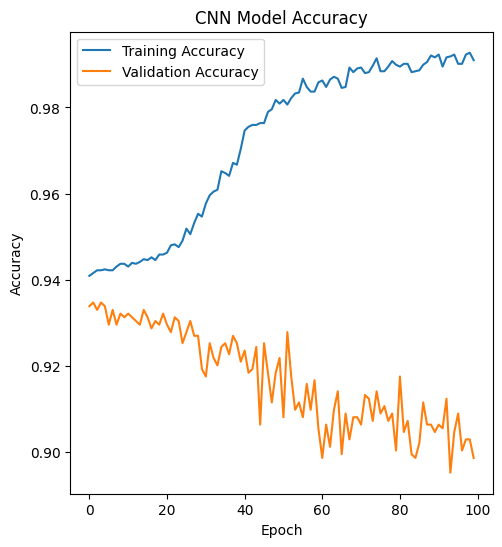

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(his_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(his_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## RNNS

In [ ]:
rnn_model = Sequential()
rnn_model.add(LSTM(50, return_sequences=True, input_shape=(X_train_x.shape[1], 1)))
rnn_model.add(LSTM(50, return_sequences=True))
rnn_model.add(LSTM(50))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
his = rnn_model.fit(X_train_dl, y_train_y, epochs=50,batch_size = 32, validation_data=(X_val_dl, y_val))

146/146 [==============================] - 19s 130ms/step - loss: 0.1877 - accuracy: 0.9422 - val_loss: 0.2392 - val_accuracy: 0.9322
Epoch 41/50
146/146 [==============================] - 17s 120ms/step - loss: 0.1840 - accuracy: 0.9427 - val_loss: 0.2413 - val_accuracy: 0.9313
Epoch 42/50
146/146 [==============================] - 19s 127ms/step - loss: 0.1806 - accuracy: 0.9431 - val_loss: 0.2520 - val_accuracy: 0.9330
Epoch 43/50
146/146 [==============================] - 19s 128ms/step - loss: 0.1842 - accuracy: 0.9435 - val_loss: 0.2477 - val_accuracy: 0.9313
Epoch 44/50
146/146 [==============================] - 18s 122ms/step - loss: 0.1809 - accuracy: 0.9431 - val_loss: 0.2362 - val_accuracy: 0.9339
Epoch 45/50
146/146 [==============================] - 17s 117ms/step - loss: 0.1813 - accuracy: 0.9435 - val_loss: 0.2406 - val_accuracy: 0.9330
Epoch 46/50
146/146 [==============================] - 17s 119ms/step - loss: 0.1807 - accuracy: 0.9425 - val_loss: 0.2474 - val_accurac

In [ ]:
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_val_dl, y_val)
print(f"CNN Model Accuracy: {rnn_accuracy}")

37/37 [==============================] - 2s 43ms/step - loss: 0.2523 - accuracy: 0.9305
CNN Model Accuracy: 0.9304720759391785


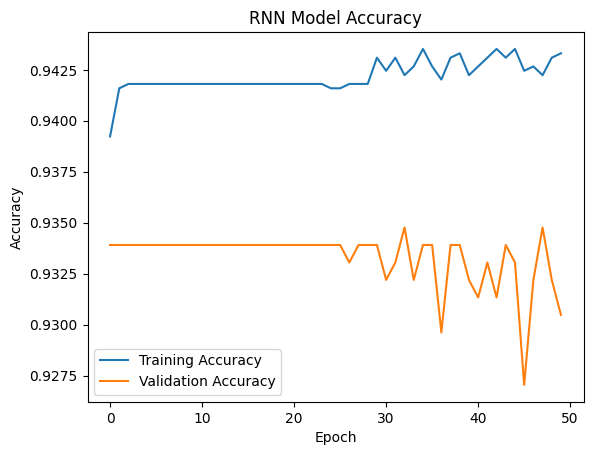

In [ ]:
plt.plot(his.history['accuracy'], label='Training Accuracy')
plt.plot(his.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Show the best model

In [ ]:
accuracies = [lr_accuracy, svm_acc, mlp_accuracy, rnn_accuracy,cnn_accuracy]
best_model_index = accuracies.index(max(accuracies))
best_model = None
if best_model_index == 0:
    print("Logistic Regression")
    best_model = model
elif best_model_index == 1:
    print("SVM")
    best_model = svm
elif best_model_index == 2:
    print("Multi-layer")
    best_model = mlp_classifier
elif best_model_index == 3:
    print("RNNs")
    best_model = rnn_model
elif best_model_index == 4:
    print("CNNs")
    best_model = cnn_model
print(best_model)

SVM
SVC()


- SVM là model tốt nhất cho dữ liệu này

In [ ]:
test_predictions = best_model.predict(X_test)
top_800_indices = test_predictions.argsort()[-800:][::-1]

In [ ]:
top_800_indices

array([3999, 1328, 1341, 1340, 1339, 1338, 1337, 1336, 1335, 1334, 1333,
       1332, 1331, 1330, 1329, 1327, 1312, 1326, 1325, 1324, 1323, 1322,
       1321, 1320, 1319, 1318, 1317, 1316, 1315, 1314, 1342, 1343, 1344,
       1345, 1372, 1371, 1370, 1369, 1368, 1367, 1366, 1365, 1364, 1363,
       1362, 1361, 1360, 1359, 1358, 1357, 1356, 1355, 1354, 1353, 1352,
       1351, 1350, 1349, 1348, 1347, 1346, 1313, 1311, 3998, 1265, 1278,
       1277, 1276, 1275, 1274, 1273, 1272, 1271, 1270, 1269, 1268, 1267,
       1266, 1264, 1310, 1263, 1262, 1261, 1260, 1259, 1258, 1257, 1256,
       1255, 1254, 1253, 1252, 1251, 1279, 1280, 1281, 1282, 1309, 1308,
       1307, 1306, 1305, 1304, 1303, 1302, 1301, 1300, 1299, 1298, 1297,
       1296, 1295, 1294, 1293, 1292, 1291, 1290, 1289, 1288, 1287, 1286,
       1285, 1284, 1283, 1373, 1374, 1375, 1453, 1466, 1465, 1464, 1463,
       1462, 1461, 1460, 1459, 1458, 1457, 1456, 1455, 1454, 1452, 1376,
       1451, 1450, 1449, 1448, 1447, 1446, 1445, 14

In [65]:
top_800_customers = test_data.iloc[top_800_indices, 0]
top_800_customers

3999    4000
1328    1329
1341    1342
1340    1341
1339    1340
        ... 
1612    1613
1611    1612
1610    1611
1609    1610
1608    1609
Name: ID, Length: 800, dtype: int64

In [ ]:
top_800_customers.to_csv('top_800_customers.csv', index=False)